<a href="https://colab.research.google.com/github/commandermaks/Python/blob/main/DecisionTreeUsingGini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment On the Decision Tree

#Conceptual code for information

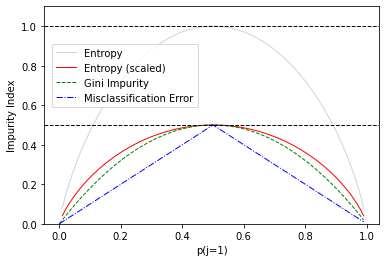

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

In [ ]:
#importing the required liabraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading Data From Dataset

In [ ]:

col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df = pd.read_csv('/content/balance-scale.data',names=col,sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


#Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


Counting Samples Classwise

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


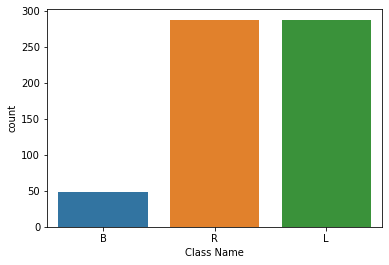

In [ ]:
sns.countplot(df['Class Name'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


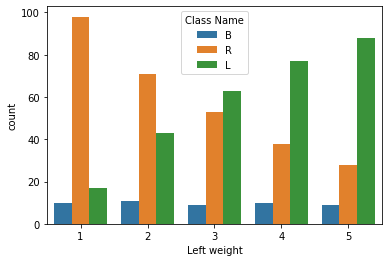

In [ ]:
sns.countplot(df['Left weight'],hue=df['Class Name'])

In [ ]:
sns.countplot(df['Right weight'],hue=df['Class Name'])

KeyError: ignored

#Training And Testing Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['Class Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

#Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_predict = clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7021276595744681

In [ ]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

AttributeError: ignored

Plotting a Graph

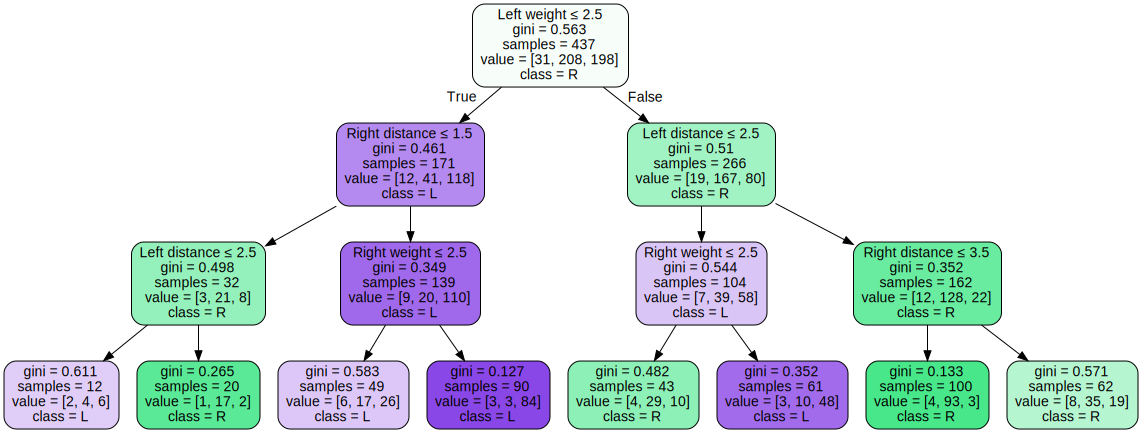

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None,
                      feature_names=feature_names,
                      class_names=target,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)

graph

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#Assignment Question
Q1. For the Same Dataset ,apply the Information Gain criterion.You May take the help of the internet.
At the end,tell which technique is suitable for this dataset?  

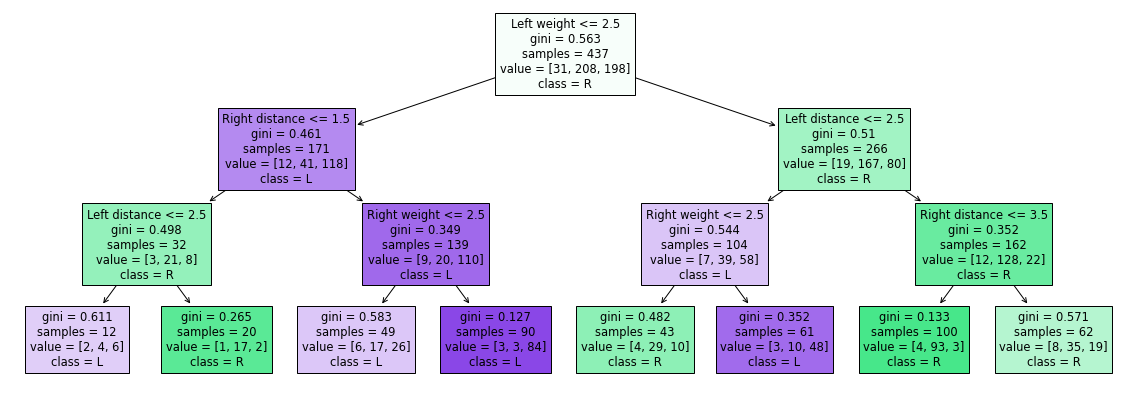

In [ ]:
clf_model = DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

fig = plt.figure(figsize = (20,7))
_= tree.plot_tree(clf_model,feature_names = feature_names,class_names= target,filled = True)
fig.savefig("decision_tree.png")

[0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0]
31
39
Gini : -1.0
Accuracy is:  0.8666666666666667


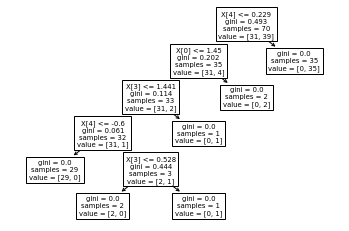

In [ ]:
#%%
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split

X, t = make_classification(100, 5, n_classes = 2, shuffle = True, random_state= 10)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, shuffle = True, random_state=1)
#%%
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, t_train)
#%%
predicted_value = model.predict(X_test)
print(predicted_value)
#%%
tree.plot_tree(model)
#%%
zeroes = 0
ones = 0
for i in range(0,len(t_train)):
	if t_train[i] == 0:
		zeroes +=1
	else:
		ones +=1
#%%
print(zeroes)
print(ones)
#%%
val = 1 - ((zeroes/70)*2 + (ones/70)*2)
print("Gini :",val)

match = 0
UnMatch = 0

for i in range(30):
	if predicted_value[i] == t_test[i]:
		match += 1
	else:
		UnMatch += 1

accuracy = match/30
print("Accuracy is: ",accuracy)


Q2.plot the graph for the Decision tree using the same?

In [ ]:
col = ['buying','maint','doors','persons','lug_boot','safety','class values']
df = pd.read_csv('/content/car-evaluation1.csv',names=col,sep=',')
df.head()



,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left weight     625 non-null    int64 
 2   Left distance   625 non-null    int64 
 3   Right weight    625 non-null    int64 
 4   Right distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
